<a href="https://colab.research.google.com/github/Liza-Sareen/ML-Datasets/blob/main/RESEARCH_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import keras
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications import VGG16
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
import cv2
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

IMPORTING AND MODEL LOADING,DATA PREPROCESING, EDA,FEATURE EXTRACTION,X AND Y EXTRACTION

In [ ]:
img_rows=128
img_cols=128
batch_size=12#128
epochs=5
x_data = []
y_data = []

In [ ]:
# Define the root directory
data_dir = '/content/drive/MyDrive/mera_data'
def list_subdirectories(root_dir):
    subdirectories = [os.path.join(root_dir, d) for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
    return subdirectories

# Get a list of all subdirectories
all_subfolders = list_subdirectories(data_dir)

# Print the list of subfolders
for subfolder in all_subfolders:
    print(subfolder)
list_dir=os.listdir(data_dir)

/content/drive/MyDrive/mera_data/BEH
/content/drive/MyDrive/mera_data/DRHAGIS
/content/drive/MyDrive/mera_data/LES-AV
/content/drive/MyDrive/mera_data/PapilaDB-PAPILA-9c67b80983805f0f886b068af800ef2b507e7dc0


In [ ]:
list_dir[0]

'BEH'

In [ ]:
def list_labels(sub_dir):
  label = [os.path.join(sub_dir, d) for d in os.listdir(sub_dir) if os.path.isdir(os.path.join(sub_dir, d))]
  print(label)

In [ ]:
labels_list = list_labels('/content/drive/MyDrive/mera_data/BEH')
print(labels_list)

['/content/drive/MyDrive/mera_data/BEH/BEH_GLUCOMA', '/content/drive/MyDrive/mera_data/BEH/BEH_NORMAL']
None


In [ ]:
data_dir = '/content/drive/MyDrive/mera_data/BEH'
labels = os.listdir(data_dir)
num_classes = len(labels)
labels

['BEH_GLUCOMA', 'BEH_NORMAL']

In [ ]:
#MY CODE:
labels=[]
for subfolder in all_subfolders:
  data_dir=subfolder
  print(subfolder)
  labels.append(os.listdir(data_dir))
  print(labels)
num_classes=len(labels)
print(labels)
print(num_classes)

/content/drive/MyDrive/mera_data/BEH
[['BEH_GLUCOMA', 'BEH_NORMAL']]
/content/drive/MyDrive/mera_data/DRHAGIS
[['BEH_GLUCOMA', 'BEH_NORMAL'], ['Manual_Segmentations', 'Mask_images', 'Fundus_Images']]
/content/drive/MyDrive/mera_data/LES-AV
[['BEH_GLUCOMA', 'BEH_NORMAL'], ['Manual_Segmentations', 'Mask_images', 'Fundus_Images'], ['veins', 'arteries', 'images', 'arteries-and-veins', 'vessel-segmentations']]
/content/drive/MyDrive/mera_data/PapilaDB-PAPILA-9c67b80983805f0f886b068af800ef2b507e7dc0
[['BEH_GLUCOMA', 'BEH_NORMAL'], ['Manual_Segmentations', 'Mask_images', 'Fundus_Images'], ['veins', 'arteries', 'images', 'arteries-and-veins', 'vessel-segmentations'], ['FundusImages', 'ExpertsSegmentations']]
[['BEH_GLUCOMA', 'BEH_NORMAL'], ['Manual_Segmentations', 'Mask_images', 'Fundus_Images'], ['veins', 'arteries', 'images', 'arteries-and-veins', 'vessel-segmentations'], ['FundusImages', 'ExpertsSegmentations']]
4


In [ ]:
data_dir = '/content/drive/MyDrive/mera_data/BEH'
labels = os.listdir(data_dir)
num_classes = len(labels)
labels

['BEH_GLUCOMA', 'BEH_NORMAL']

In [ ]:
# def flatten_list(nested_list):
#     return [item for sublist in nested_list for item in sublist]

# # Example nested list
# labels=[['BEH_GLUCOMA', 'BEH_NORMAL'], ['Manual_Segmentations', 'Mask_images', 'Fundus_Images'], ['masks', 'veins', 'arteries', 'images', 'arteries-and-veins', 'vessel-segmentations'], ['FundusImages', 'ClinicalData', 'ExpertsSegmentations'], ['Images']]
# # Flatten the nested list
# labels = flatten_list(labels)
# print(labels)


In [ ]:
for subfolder in all_subfolders:
  print(subfolder)

/content/drive/MyDrive/mera_data/BEH
/content/drive/MyDrive/mera_data/DRHAGIS
/content/drive/MyDrive/mera_data/LES-AV
/content/drive/MyDrive/mera_data/PapilaDB-PAPILA-9c67b80983805f0f886b068af800ef2b507e7dc0


In [ ]:
dataset_dir='/content/drive/MyDrive/mera_data/BEH'
LIFE_LAB=os.listdir(dataset_dir)
# print(LIFE_LAB)#['BEH_GLUCOMA', 'BEH_NORMAL']
num_classes=len(LIFE_LAB)
#print(num_classes)#2
img_rows,img_cols=128,128

In [ ]:
#model loading
#data preprocessing


SCALING, TRAIN TEST SPLIT, MODEL SELECTION, EVALUATE MODEL

In [ ]:
for label,category in enumerate(LIFE_LAB):
  name=list_dir[label]
  #print(name)#BEH
  #print(list_dir)#['BEH', 'DRHAGIS', 'LES-AV', 'PapilaDB-PAPILA-9c67b80983805f0f886b068af800ef2b507e7dc0']
  #print(list_dir[label])#BEH FOR 0, DRHAGIS FOR 1
  data=[]
  labels=[]
  category_dir=os.path.join(dataset_dir,category)
  #print(category_dir)#/content/drive/MyDrive/mera_data/BEH/BEH_GLUCOMA for 0 and /content/drive/MyDrive/mera_data/BEH/BEH_GLUCOMA and /content/drive/MyDrive/mera_data/BEH/BEH_NORMAL for 1
  ########################################################################
  # print(category_dir)/content/drive/MyDrive/mera_data/BEH/BEH_GLUCOMA
  #print(os.listdir(category_dir))['IM003321.JPG', 'IM003320.JPG', 'IM003260.JPG'..
  for img_file in os.listdir(category_dir):
    #print(img_file)IM003321.JPG
    img_path=os.path.join(category_dir,img_file)
    #print(img_path)/content/drive/MyDrive/mera_data/BEH/BEH_GLUCOMA/IM003321.JPG
    img=cv2.imread(img_path)#arrays and numbers of imgs
    if img is not None:
      img=cv2.resize(img,(img_rows,img_cols))
    else:
      print("Image not loaded or does not exist.")
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    data.append(img)#data is array of images ie x
    labels.append(label)#type of image ie y
  data=np.array(data)#scaling of images
  data=data.astype('float32')/255.0#scaling
  labels=np.array(labels)#scaling of y
  from sklearn.model_selection import train_test_split
  x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
  y_train = to_categorical(y_train, num_classes)#converting to binary
  y_test = to_categorical(y_test, num_classes)
  #model building
  model_run(1)
  epochs_list=[]
  start_time_list=[]
  stop_time_list=[]
  loss_list=[]
  accuracy_list=[]
  start_time_total=datetime.datetime.now()
  for epoch in range(epochs):
    dataframe(1)
  stop_time_total = datetime.datetime.now()
  history_df = pd.DataFrame({
      'epoch': epochs_list,
      'start_time': start_time_list,
      'stop_time': stop_time_list,
      'loss': loss_list,
      'accuracy': accuracy_list,
      'execution_time':stop_time_total
      })
  print(type(epochs))
  print(history_df.head())
  print(history_df.dtypes)
  history_df['Experiment']=1
  history_df['Optimizer']="PSO"
  history_df['Dataset']=name
  history_df['Objfname']="CNN"
  history_df['Iteration accuracy']=accuracy
  history_df=history_df[['epoch','Optimizer','Dataset','Objfname','Experiment','start_time','stop_time','execution_time','accuracy','loss','Iteration accuracy']]
  print(type(epochs))
  existing_data = pd.read_excel("/content/file.xlsx")
  two(1)
  curve_draw_convergance(1)
  class Metric:
    def __init__(self, train_X, test_X, train_Y, test_Y):
      self.train_X = train_X
      self.test_X = test_X
      self.train_Y = train_Y
      self.test_Y = test_Y
      self.model = self.create_model()

      self.predictions = self.classify()
      self.accuracy = self.compute_accuracy()
      self.precision = self.compute_precision()
      self.recall = self.compute_recall()
      self.f1_score = self.compute_f1()
      self.confusion_matrix = self.compute_confusion_matrix()

      self.plot_confusion_matrix()
    def create_model(self):
      model = Sequential()
      model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
      model.add(Conv2D(64, (3, 3), activation='relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))
      model.add(Flatten())
      model.add(Dense(128, activation='relu'))
      model.add(Dropout(0.5))
      model.add(Dense(num_classes, activation='softmax'))
      model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=Adam(),
                    metrics=['accuracy'])
      return model
    def classify(self):
      self.model.fit(self.train_X, self.train_Y, epochs=1, batch_size=32, verbose=0)
      predictions = self.model.predict(self.test_X)
      return np.argmax(predictions, axis=1)
      return predictions.flatten()

    def compute_accuracy(self):
      _, accuracy = self.model.evaluate(self.test_X, self.test_Y, verbose=0)
      return accuracy

    def compute_precision(self):
      return precision_score(np.argmax(self.test_Y, axis=1), self.predictions, average='weighted')
    def compute_recall(self):
      return recall_score(np.argmax(self.test_Y, axis=1), self.predictions, average='weighted')

    def compute_f1(self):
      return f1_score(np.argmax(self.test_Y, axis=1), self.predictions, average='weighted')

    def compute_confusion_matrix(self):
      return confusion_matrix(np.argmax(self.test_Y, axis=1), self.predictions)

    def plot_confusion_matrix(self):
      cm = self.compute_confusion_matrix()
      disp = ConfusionMatrixDisplay(confusion_matrix=cm)
      disp.plot(cmap=plt.cm.Blues, values_format='d')
      plt.title('Confusion Matrix-CNN')
      plt.show()
  metric_cnn = Metric(x_train, x_test, y_train, y_test)
  precision_cnn = metric_cnn.precision
  recall_cnn = metric_cnn.recall
  f1_score_cnn = metric_cnn.f1_score
  print(f"K-Nearest Neighbors Precision: {precision_cnn}")
  print(f"K-Nearest Neighbors Recall: {recall_cnn}")
  print(f"K-Nearest Neighbors F1-Score: {f1_score_cnn}")

KeyboardInterrupt: 

In [ ]:
def model_run(number):
  model=Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                   activation='relu',
                   input_shape=(img_rows, img_cols, 1)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])
  print('done')

In [ ]:
def dataframe(number):
  start_time=datetime.datetime.now()
  history=model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=1,
                    verbose=1,
                    validation_data=(x_test,y_test))
  stop_time=datetime.datetime.now()
  loss=history.history['loss'][0]
  print(loss)
  accuracy=history.history['accuracy'][0]
  epochs_list.append(epoch + 1)
  start_time_list.append(start_time)
  stop_time_list.append(stop_time)
  loss_list.append(loss)
  accuracy_list.append(accuracy)
  print(f"Epoch {epoch + 1}: Start Time - {start_time}, Stop Time - {stop_time}")
  print(f'Test loss for Epoch {epoch + 1}: {loss}')
  print(f'Test accuracy for Epoch {epoch + 1}: {accuracy}')

In [ ]:
def format_date(date):
  return pd.to_datetime(date).strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
def two(number):
  combined_data = pd.concat([existing_data, history_df], ignore_index=True)
  combined_data['start_time']=combined_data['start_time'].apply(format_date)
  combined_data['stop_time']=combined_data['stop_time'].apply(format_date)
  combined_data.to_excel('file.xlsx', index=False)
  import matplotlib.pyplot as plt
  print(type(epochs))
  epoch_values = [1,2,3,4,5]  # X-axis values (e.g., epochs or iterations)
  loss_values = loss_list  # Y-axis values (e.g., loss)
  print(loss_values)

In [ ]:
def curve_draw_convergance(number):
  plt.figure(figsize=(8, 6))
  plt.plot(epoch_values, loss_values, marker='o', linestyle='-')
  plt.title('Convergence Curve')
  plt.xlabel('Epochs')
  print(type(epochs))
  plt.ylabel('Loss')
  plt.grid(True)
  plt.show()
  i=1
  plt.savefig(f"Conv_curve{i}.png",format="png")
  data1=pd.read_excel('/content/file.xlsx')
  plot=sns.boxplot(data=data1,x=data1['accuracy'],color='yellow')
  plt.xlabel('Accuracy')
  sns.displot(data1['accuracy'],kde=True)
  plt.savefig("box.png", format="png")
  plt.show()
  i=i+1

done
12/12 [==============================] - 17s 1s/step - loss: 0.0616 - accuracy: 0.9559 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.06164925917983055
Epoch 1: Start Time - 2024-06-07 16:04:02.416613, Stop Time - 2024-06-07 16:04:19.088924
Test loss for Epoch 1: 0.06164925917983055
Test accuracy for Epoch 1: 0.9558823704719543
12/12 [==============================] - 18s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
Epoch 2: Start Time - 2024-06-07 16:04:19.089205, Stop Time - 2024-06-07 16:04:39.639816
Test loss for Epoch 2: 0.0
Test accuracy for Epoch 2: 1.0
12/12 [==============================] - 15s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
Epoch 3: Start Time - 2024-06-07 16:04:39.640090, Stop Time - 2024-06-07 16:05:00.180362
Test loss for Epoch 3: 0.0
Test accuracy for Epoch 3: 1.0
12/12 [==============================] - 15s 1s/step - loss: 0.0000e+00 - accuracy: 1.00

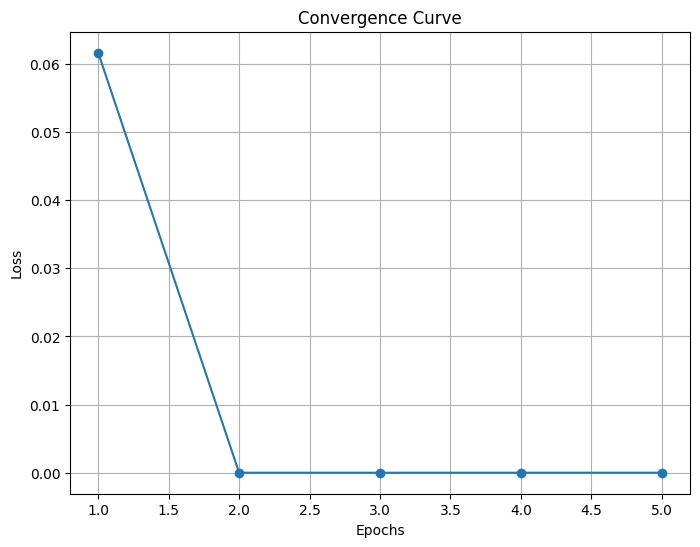

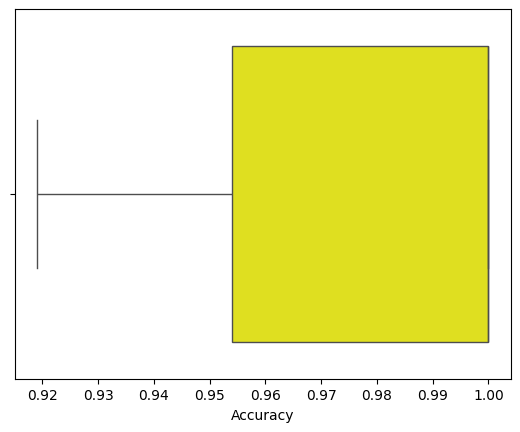

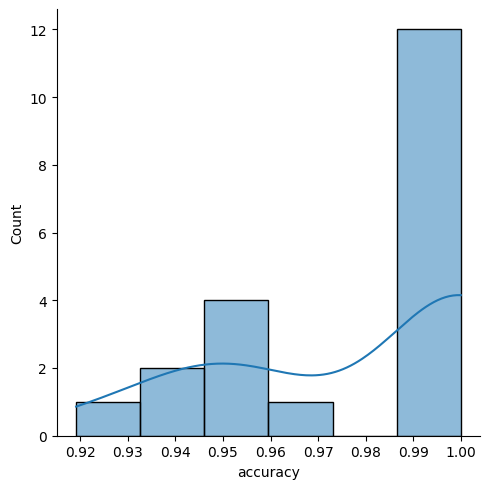

2/2 [==============================] - 1s 70ms/step


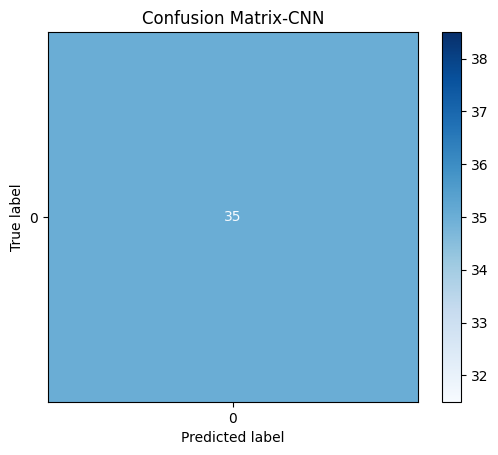

K-Nearest Neighbors Precision: 1.0
K-Nearest Neighbors Recall: 1.0
K-Nearest Neighbors F1-Score: 1.0
done
31/31 [==============================] - 43s 1s/step - loss: 0.0221 - accuracy: 0.9865 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.022083429619669914
Epoch 1: Start Time - 2024-06-07 16:06:42.242879, Stop Time - 2024-06-07 16:08:05.725135
Test loss for Epoch 1: 0.022083429619669914
Test accuracy for Epoch 1: 0.9864864945411682
31/31 [==============================] - 40s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
Epoch 2: Start Time - 2024-06-07 16:08:05.725399, Stop Time - 2024-06-07 16:08:46.272717
Test loss for Epoch 2: 0.0
Test accuracy for Epoch 2: 1.0
31/31 [==============================] - 42s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
0.0
Epoch 3: Start Time - 2024-06-07 16:08:46.273819, Stop Time - 2024-06-07 16:10:08.264572
Test loss for Epoch 3: 0.0
Test accuracy fo

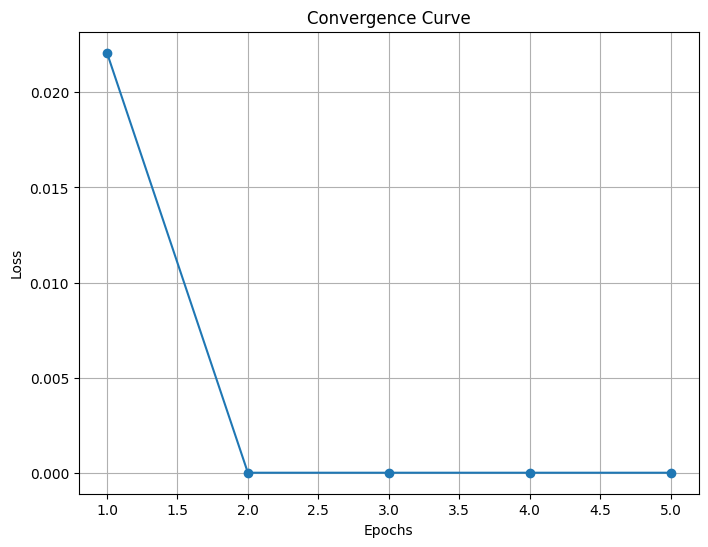

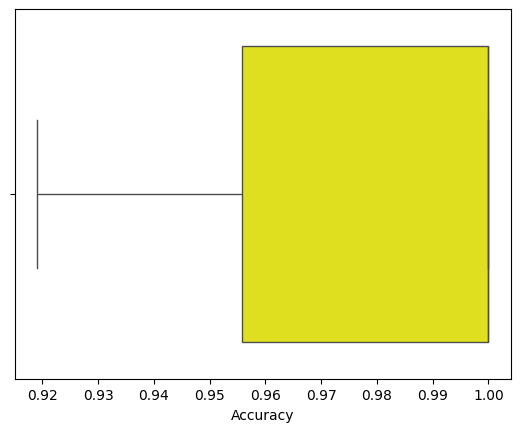

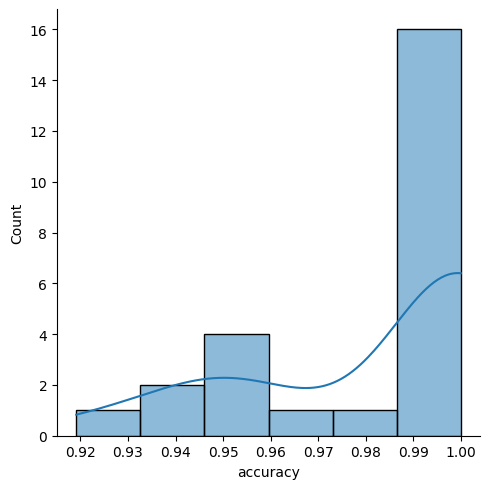

3/3 [==============================] - 3s 610ms/step


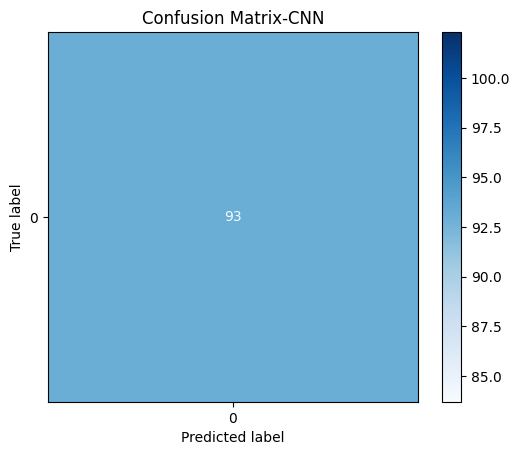

K-Nearest Neighbors Precision: 1.0
K-Nearest Neighbors Recall: 1.0
K-Nearest Neighbors F1-Score: 1.0


In [ ]:
for label,category in enumerate(LIFE_LAB):
  name=list_dir[label]
  #print(name)#BEH
  #print(list_dir)#['BEH', 'DRHAGIS', 'LES-AV', 'PapilaDB-PAPILA-9c67b80983805f0f886b068af800ef2b507e7dc0']
  #print(list_dir[label])#BEH FOR 0, DRHAGIS FOR 1
  data=[]
  labels=[]
  category_dir=os.path.join(dataset_dir,category)
  #print(category_dir)#/content/drive/MyDrive/mera_data/BEH/BEH_GLUCOMA for 0 and /content/drive/MyDrive/mera_data/BEH/BEH_GLUCOMA and /content/drive/MyDrive/mera_data/BEH/BEH_NORMAL for 1
  ########################################################################
  # print(category_dir)/content/drive/MyDrive/mera_data/BEH/BEH_GLUCOMA
  #print(os.listdir(category_dir))['IM003321.JPG', 'IM003320.JPG', 'IM003260.JPG'..
  for img_file in os.listdir(category_dir):
    #print(img_file)IM003321.JPG
    img_path=os.path.join(category_dir,img_file)
    #print(img_path)/content/drive/MyDrive/mera_data/BEH/BEH_GLUCOMA/IM003321.JPG
    img=cv2.imread(img_path)#arrays and numbers of imgs
    if img is not None:
      img=cv2.resize(img,(img_rows,img_cols))
    else:
      print("Image not loaded or does not exist.")
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    data.append(img)#data is array of images ie x
    labels.append(label)#type of image ie y
  data=np.array(data)#scaling of images
  data=data.astype('float32')/255.0#scaling
  labels=np.array(labels)#scaling of y
  from sklearn.model_selection import train_test_split
  x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
  y_train = to_categorical(y_train, num_classes)#converting to binary
  y_test = to_categorical(y_test, num_classes)
  #model building
  model=Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                   activation='relu',
                   input_shape=(img_rows, img_cols, 1)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])
  print('done')
  epochs_list=[]
  start_time_list=[]
  stop_time_list=[]
  loss_list=[]
  accuracy_list=[]
  start_time_total=datetime.datetime.now()
  for epoch in range(epochs):
    start_time=datetime.datetime.now()
    history=model.fit(x_train,y_train,
                      batch_size=batch_size,
                      epochs=1,
                      verbose=1,
                      validation_data=(x_test,y_test))
    stop_time=datetime.datetime.now()
    loss=history.history['loss'][0]
    print(loss)
    accuracy=history.history['accuracy'][0]
    epochs_list.append(epoch + 1)
    start_time_list.append(start_time)
    stop_time_list.append(stop_time)
    loss_list.append(loss)
    accuracy_list.append(accuracy)
    print(f"Epoch {epoch + 1}: Start Time - {start_time}, Stop Time - {stop_time}")
    print(f'Test loss for Epoch {epoch + 1}: {loss}')
    print(f'Test accuracy for Epoch {epoch + 1}: {accuracy}')
  stop_time_total = datetime.datetime.now()
  history_df = pd.DataFrame({
      'epoch': epochs_list,
      'start_time': start_time_list,
      'stop_time': stop_time_list,
      'loss': loss_list,
      'accuracy': accuracy_list,
      'execution_time':stop_time_total
      })
  print(type(epochs))
  print(history_df.head())
  print(history_df.dtypes)
  history_df['Experiment']=1
  history_df['Optimizer']="PSO"
  history_df['Dataset']=name
  history_df['Objfname']="CNN"
  history_df['Iteration accuracy']=accuracy
  history_df=history_df[['epoch','Optimizer','Dataset','Objfname','Experiment','start_time','stop_time','execution_time','accuracy','loss','Iteration accuracy']]
  print(type(epochs))
  existing_data = pd.read_excel("/content/file.xlsx")
  combined_data = pd.concat([existing_data, history_df], ignore_index=True)
  combined_data['start_time']=combined_data['start_time'].apply(format_date)
  combined_data['stop_time']=combined_data['stop_time'].apply(format_date)
  combined_data.to_excel('file.xlsx', index=False)
  import matplotlib.pyplot as plt
  print(type(epochs))
  epoch_values = [1,2,3,4,5]  # X-axis values (e.g., epochs or iterations)
  loss_values = loss_list  # Y-axis values (e.g., loss)
  print(loss_values)
  curve_draw_convergance(1)
  class Metric:
    def __init__(self, train_X, test_X, train_Y, test_Y):
      self.train_X = train_X
      self.test_X = test_X
      self.train_Y = train_Y
      self.test_Y = test_Y
      self.model = self.create_model()

      self.predictions = self.classify()
      self.accuracy = self.compute_accuracy()
      self.precision = self.compute_precision()
      self.recall = self.compute_recall()
      self.f1_score = self.compute_f1()
      self.confusion_matrix = self.compute_confusion_matrix()

      self.plot_confusion_matrix()
    def create_model(self):
      model = Sequential()
      model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
      model.add(Conv2D(64, (3, 3), activation='relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))
      model.add(Flatten())
      model.add(Dense(128, activation='relu'))
      model.add(Dropout(0.5))
      model.add(Dense(num_classes, activation='softmax'))
      model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=Adam(),
                    metrics=['accuracy'])
      return model
    def classify(self):
      self.model.fit(self.train_X, self.train_Y, epochs=1, batch_size=32, verbose=0)
      predictions = self.model.predict(self.test_X)
      return np.argmax(predictions, axis=1)
      return predictions.flatten()

    def compute_accuracy(self):
      _, accuracy = self.model.evaluate(self.test_X, self.test_Y, verbose=0)
      return accuracy

    def compute_precision(self):
      return precision_score(np.argmax(self.test_Y, axis=1), self.predictions, average='weighted')
    def compute_recall(self):
      return recall_score(np.argmax(self.test_Y, axis=1), self.predictions, average='weighted')

    def compute_f1(self):
      return f1_score(np.argmax(self.test_Y, axis=1), self.predictions, average='weighted')

    def compute_confusion_matrix(self):
      return confusion_matrix(np.argmax(self.test_Y, axis=1), self.predictions)

    def plot_confusion_matrix(self):
      cm = self.compute_confusion_matrix()
      disp = ConfusionMatrixDisplay(confusion_matrix=cm)
      disp.plot(cmap=plt.cm.Blues, values_format='d')
      plt.title('Confusion Matrix-CNN')
      plt.show()
  metric_cnn = Metric(x_train, x_test, y_train, y_test)
  precision_cnn = metric_cnn.precision
  recall_cnn = metric_cnn.recall
  f1_score_cnn = metric_cnn.f1_score
  print(f"K-Nearest Neighbors Precision: {precision_cnn}")
  print(f"K-Nearest Neighbors Recall: {recall_cnn}")
  print(f"K-Nearest Neighbors F1-Score: {f1_score_cnn}")

In [ ]:
for subfolder in all_subfolders:
  dataset_dir = subfolder
  LIFE_LAB = os.listdir(dataset_dir)
  num_classes=len(LIFE_LAB)
  # Define your image dimensions
  img_rows, img_cols = 128, 128  # Adjust this as needed
  # Load and preprocess your dataset
  for label, category in enumerate(LIFE_LAB):
    name=list_dir[label]
    data = []
    labels = []
    category_dir = os.path.join(dataset_dir, category)
    for img_file in os.listdir(category_dir):
      img_path = os.path.join(category_dir, img_file)
      img = cv2.imread(img_path)
      # Check if the image loaded successfully
      if image is not None:
        # Resize the image to a new size
        # print(img_path)
        img = cv2.resize(img, (img_rows, img_cols))
      else:
        print("Image not loaded or does not exist.")
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      data.append(img)
      labels.append(label)
    data = np.array(data)
    data = data.astype('float32') / 255.0
    labels = np.array(labels)
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
    # Convert class vectors to binary class matrices
    num_classes = num_classes  # Glaucoma and Normal
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    # Build your model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(img_rows, img_cols, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    batch_size = 12#128
    print("done")
    epochs_list=[]
    start_time_list=[]
    stop_time_list=[]
    loss_list=[]
    accuracy_list=[]
    start_time_total=datetime.datetime.now()
    for epoch in range(epochs):
      start_time=datetime.datetime.now()
      history=model.fit(x_train,y_train,
                        batch_size=batch_size,
                        epochs=1,
                        verbose=1,
                        validation_data=(x_test,y_test))
      stop_time=datetime.datetime.now()
      loss=history.history['loss'][0]
      print(loss)
      accuracy=history.history['accuracy'][0]
      epochs_list.append(epoch + 1)
      start_time_list.append(start_time)
      stop_time_list.append(stop_time)
      loss_list.append(loss)

      accuracy_list.append(accuracy)
      print(f"Epoch {epoch + 1}: Start Time - {start_time}, Stop Time - {stop_time}")
      print(f'Test loss for Epoch {epoch + 1}: {loss}')
      print(f'Test accuracy for Epoch {epoch + 1}: {accuracy}')
    stop_time_total = datetime.datetime.now()
    history_df = pd.DataFrame({
        'epoch': epochs_list,
        'start_time': start_time_list,
        'stop_time': stop_time_list,
        'loss': loss_list,
        'accuracy': accuracy_list,
        'execution_time':stop_time_total
        })
    print(type(epochs))
    print(history_df.head())
    print(history_df.dtypes)
    history_df['Experiment']=1
    history_df['Optimizer']="PSO"
    history_df['Dataset']=name
    history_df['Objfname']="CNN"
    history_df['Iteration accuracy']=accuracy
    history_df=history_df[['epoch','Optimizer','Dataset','Objfname','Experiment','start_time','stop_time','execution_time','accuracy','loss','Iteration accuracy']]
    print(type(epochs))
    existing_data = pd.read_excel("/content/file.xlsx")
    def format_date(date):
      return pd.to_datetime(date).strftime('%Y-%m-%d %H:%M:%S')
    combined_data = pd.concat([existing_data, history_df], ignore_index=True)
    combined_data['start_time']=combined_data['start_time'].apply(format_date)
    combined_data['stop_time']=combined_data['stop_time'].apply(format_date)
    combined_data.to_excel('file.xlsx', index=False)
    import matplotlib.pyplot as plt
    print(type(epochs))
    epoch_values = [1,2,3,4,5]  # X-axis values (e.g., epochs or iterations)
    loss_values = loss_list  # Y-axis values (e.g., loss)
    print(loss_values)
  # Create the convergence curve plot
    plt.figure(figsize=(8, 6))
    plt.plot(epoch_values, loss_values, marker='o', linestyle='-')
    plt.title('Convergence Curve')
    plt.xlabel('Epochs')
    print(type(epochs))
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()
    i=1
    plt.savefig(f"Conv_curve{i}.png",format="png")
    data1=pd.read_excel('/content/file.xlsx')
    plot=sns.boxplot(data=data1,x=data1['accuracy'],color='yellow')
    plt.xlabel('Accuracy')
    sns.displot(data1['accuracy'],kde=True)
    plt.savefig("box.png", format="png")
    plt.show()
    i=i+1
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    class Metric:
      def __init__(self, train_X, test_X, train_Y, test_Y):
        self.train_X = train_X
        self.test_X = test_X
        self.train_Y = train_Y
        self.test_Y = test_Y
        self.model = self.create_model()

        self.predictions = self.classify()
        self.accuracy = self.compute_accuracy()
        self.precision = self.compute_precision()
        self.recall = self.compute_recall()
        self.f1_score = self.compute_f1()
        self.confusion_matrix = self.compute_confusion_matrix()

        self.plot_confusion_matrix()

      def create_model(self):
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=Adam(),
                      metrics=['accuracy'])
        return model

      def classify(self):
        self.model.fit(self.train_X, self.train_Y, epochs=1, batch_size=32, verbose=0)
        predictions = self.model.predict(self.test_X)
        return np.argmax(predictions, axis=1)
        return predictions.flatten()

      def compute_accuracy(self):
        _, accuracy = self.model.evaluate(self.test_X, self.test_Y, verbose=0)
        return accuracy

      def compute_precision(self):
        return precision_score(np.argmax(self.test_Y, axis=1), self.predictions, average='weighted')
      def compute_recall(self):
        return recall_score(np.argmax(self.test_Y, axis=1), self.predictions, average='weighted')

      def compute_f1(self):
        return f1_score(np.argmax(self.test_Y, axis=1), self.predictions, average='weighted')

      def compute_confusion_matrix(self):
        return confusion_matrix(np.argmax(self.test_Y, axis=1), self.predictions)

      def plot_confusion_matrix(self):
        cm = self.compute_confusion_matrix()
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title('Confusion Matrix-CNN')
        plt.show()
    metric_cnn = Metric(x_train, x_test, y_train, y_test)
    precision_cnn = metric_cnn.precision
    recall_cnn = metric_cnn.recall
    f1_score_cnn = metric_cnn.f1_score
    print(f"K-Nearest Neighbors Precision: {precision_cnn}")
    print(f"K-Nearest Neighbors Recall: {recall_cnn}")
    print(f"K-Nearest Neighbors F1-Score: {f1_score_cnn}")
    # FP=int(input("Enter Fp"))
    # TP=int(input("Enter Tp"))
    # TN=int(input("Enter tn"))
    # FN=int(input("Enter Fn"))
    # sensitivity = TP / (TP + FN)
    # print("Sensitivity (Recall):", sensitivity)
    # specificity = TN / (TN + FP)
    # print("Specificity:", specificity)
    # import math
    # g_mean = math.sqrt(sensitivity * specificity)
    # print("G-Mean:", g_mean)
    # history_df['Sensitivity']=sensitivity
    # history_df['specificity']=specificity
    # history_df['g_mean']=g_mean
    # history_df=history_df[['epoch','Optimizer','Dataset','Objfname','Experiment','start_time','stop_time','execution_time','accuracy','loss','Iteration accuracy',
    #                      'Sensitivity','specificity','g_mean']]

In [ ]:
# pd.read_

In [ ]:
# loss_values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier as KNN
#from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.svm import SVC as SVM

from sklearn.naive_bayes import GaussianNB as NB
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neural_network import MLPClassifier as NN

def newrocplot(predictions,y,clf):
    n_classes=len(set(y))
    y_test = y
    '''x_test = x
    y_test = y
    print(len(y_test))'''

    print(n_classes)

    pred1=model.predict(x_test)

    t1=sum(x==0 for x in pred1-y_test)/len(pred1)

    ### MACRO
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
##        fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])


    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    return fpr["macro"],tpr["macro"],roc_auc["macro"]


if __name__=="__main__":

    iris = datasets.load_iris()
    x = iris.data[:, 2:]
    y = iris.target
    x_test = x
    y_test = y

    newrocplot(x,y,"rf")
'''NAIVE BAYES'''


In [ ]:
def func(x):
  n,sf,sp,l = x[0],x[1],x[2],x[3]

  model = Sequential()
  model.add(Conv2D(32,kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(n, (sf, sf), activation='relu'))
  model.add(MaxPooling2D(pool_size=(sp, sp),strides=(l,l)))
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

  cp = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')];

  model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(x_test, y_test),callbacks=cp)

  score = model.evaluate(x_test, y_test, verbose=0)

  # loss, val
  print('current config:',x,'val:',score[1])
  return score[1]

##################################################################
# pso = Pso(swarmsize=4,maxiter=14)
# # n,sf,sp,l
# bp,value = pso.run(func,[1,2,2,2],[16,8,4,4])

# v = func(bp);

# Define the objective function
def func(x):
    return sum(x)

# Set the hyperparameters for PSO
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Set the bounds for the particles
min_bound = [1, 2, 2, 2]
max_bound = [16, 8, 4, 4]
bounds = (min_bound, max_bound)

# Define the PSO optimizer using the GlobalBestPSO class
optimizer = pso(n_particles=4, dimensions=4, options=options, bounds=bounds)

# Run the PSO optimizer
best_position, best_value = optimizer.optimize(func, iters=14)

# Print the best position and value
print("Best position: ", best_position)
print("Best value: ", best_value)

##################################################################


In [ ]:

def func(x):
  n,sf,sp,l = x[0],x[1],x[2],x[3]

  model = Sequential()
  model.add(Conv2D(32,kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(n, (sf, sf), activation='relu'))
  model.add(MaxPooling2D(pool_size=(sp, sp),strides=(l,l)))
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

  cp = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')];

  model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data=(x_test, y_test),callbacks=cp)

  score = model.evaluate(x_test, y_test, verbose=0)

  # loss, val
  print('current config:',x,'val:',score[1])
  return score[1]

##################################################################
pso = Pso(swarmsize=4,maxiter=14)
# n,sf,sp,l
bp,value = pso.run(func,[1,2,2,2],[16,8,4,4])

v = func(bp);

##################################################################

print('Test loss:', bp)
print('Test accuracy:', value,v)

NameError: name 'Pso' is not defined